<a href="https://colab.research.google.com/github/Indranil-R/HCLTech-GenAI-Assignments/blob/main/18_Salary_Prediction_Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing req

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

 Load dataset

In [10]:
df = pd.read_csv("Salary_Data.csv")

df = df.dropna()

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Encoding

In [11]:
gender = LabelEncoder()
edu = LabelEncoder()
job = LabelEncoder()

df['Gender'] = gender.fit_transform(df['Gender'])
df['Education Level'] = edu.fit_transform(df['Education Level'])
df['Job Title'] = job.fit_transform(df['Job Title'])


In [12]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [13]:
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Absolute Importance': np.abs(model.coef_)
}).sort_values(by='Absolute Importance', ascending=False)

print(coef_df)


               Feature   Coefficient  Absolute Importance
2      Education Level  15062.978273         15062.978273
1               Gender   7275.180023          7275.180023
0                  Age   3383.457724          3383.457724
4  Years of Experience   2182.534156          2182.534156
3            Job Title     45.923613            45.923613


Visualize

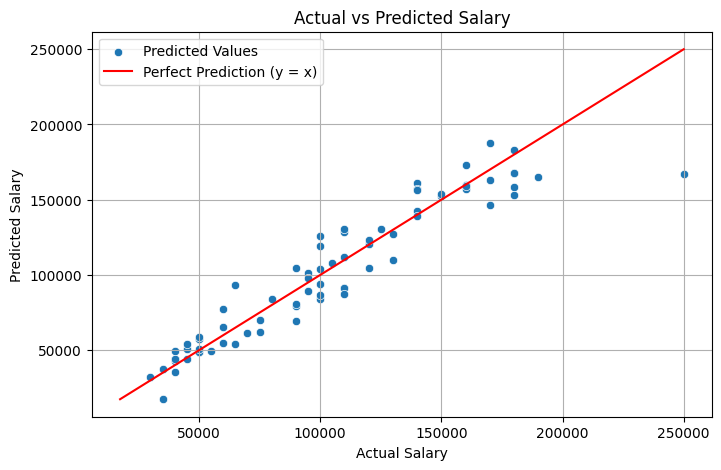

In [23]:
plt.figure(figsize=(8,5))

sns.scatterplot(x=y_test, y=y_pred, label='Predicted Values')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], '-', color='red', label='Perfect Prediction (y = x)')

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)

plt.legend()

plt.show()
